<a href="https://colab.research.google.com/github/premstaller1/uniproject-Data-Analytics/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path

marketing = pd.read_csv("bank_marketing.csv", sep=",", encoding='latin')
#marketing.head(10)
marketing

,age,education,default,balance,housing,contact,month,duration,campaign,TermDeposit
0,31,secondary,no,131,yes,cellular,may,294,1,no
1,35,tertiary,no,171,no,cellular,aug,204,2,no
2,28,secondary,no,3029,yes,cellular,may,58,6,no
3,29,secondary,no,1937,no,unknown,aug,6,1,no
4,54,secondary,no,1483,yes,cellular,may,53,2,no
...,...,...,...,...,...,...,...,...,...,...
11297,36,tertiary,no,307,yes,cellular,may,341,1,no
11298,50,tertiary,no,0,no,cellular,aug,128,2,no
11299,30,tertiary,no,3330,no,cellular,aug,109,6,no
11300,45,secondary,no,2353,yes,cellular,may,435,7,no


# Gemeinsamer Bereich

In [11]:
marketing.describe()

,age,balance,duration,campaign
count,11302.000000,11302.000000,11302.000000,11302.000000
mean,40.813750,1399.844364,258.175013,2.738276
std,10.529218,3131.946497,258.786621,3.085483
min,18.000000,-8019.000000,1.000000,1.000000
25%,33.000000,68.000000,102.000000,1.000000
50%,39.000000,458.000000,180.000000,2.000000
75%,48.000000,1411.000000,318.000000,3.000000
max,95.000000,66721.000000,3785.000000,55.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate numerical summaries

mean_age = marketing['age'].mean()
median_age = marketing['age'].median()
mode_age = marketing['age'].mode().iloc[0]

median_balance = marketing['balance'].median()
std_balance = marketing['balance'].std()

min_duration = marketing['duration'].min()
var_duration = marketing['duration'].var()

max_campaign = marketing['campaign'].max()
range_campaign = np.ptp(marketing['campaign'])

# Print the numerical summaries

print('Mean age:', mean_age)
print('Median age:', median_age)
print('Mode age:', mode_age)
print('Median balance:', median_balance)
print('Standard deviation of balance:', std_balance)
print('Minimum duration:', min_duration)
print('Variance of duration:', var_duration)
print('Maximum campaign:', max_campaign)
print('Range of campaign:', range_campaign)

Mean age: 40.813749778800215
Median age: 39.0
Mode age: 32
Median balance: 458.0
Standard deviation of balance: 3131.9464973048307
Minimum duration: 1
Variance of duration: 66970.51498307656
Maximum campaign: 55
Range of campaign: 54


Insights:
- The mean age of customers in the dataset is 40.81 years old.
- The median age of customers is slightly lower at 39 years old, which means that the distribution of age may be slightly skewed.
- The mode age is 32, which suggests that there may be a relatively large number of customers in their early thirties in the dataset.
- The median balance is 458, which means that half of the customers have a balance below this value and half have a balance above it.
- The standard deviation of balance is quite high at 3131.95, indicating that the balance varies widely across the customers in the dataset.
- The minimum duration of a call is just 1 second, suggesting that some calls may have been disconnected very quickly.
- The variance of duration is quite high at 66970.51, indicating that the duration of calls varies widely across the customers in the dataset.
- The maximum number of campaign contacts for a customer is 55, while the minimum is 1. The range of campaign contacts is 54, which suggests that there may be a wide variation in the number of contacts made with customers. 


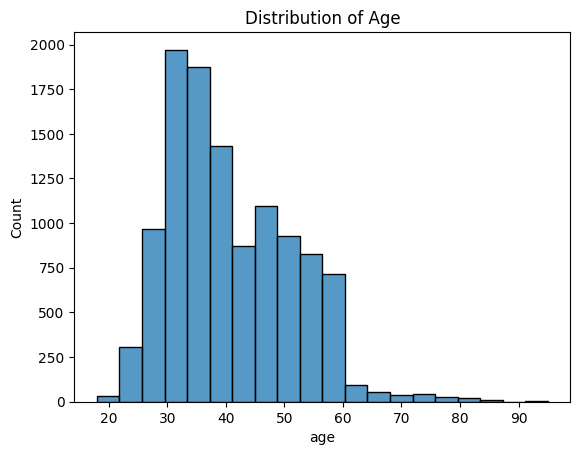

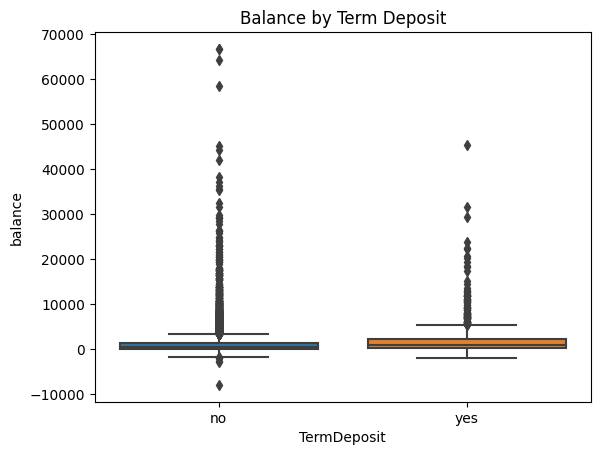

In [13]:
sns.histplot(marketing['age'], bins=20, kde=False)
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x='TermDeposit', y='balance', data=marketing)
plt.title('Balance by Term Deposit')
plt.show()

Insights:
1. Histogram of age: We can see the distribution of age across the customers in the dataset, which can help us to identify any patterns or trends. For example, we may notice that there are more customers in their thirties or forties, which could be a target demographic for marketing efforts.
2. Box plot of balance: We can see the median, quartiles, and outliers of the balance variable. For example, we notice that there are a few customers with very high balances, which could be a target group for marketing efforts.


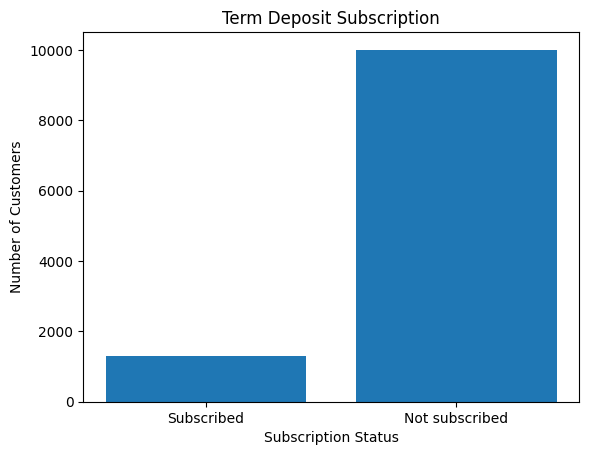

In [14]:
import matplotlib.pyplot as plt

# Count the number of customers who subscribed and did not subscribe
subscribed = marketing[marketing['TermDeposit'] == 'yes']['TermDeposit'].count()
not_subscribed = marketing[marketing['TermDeposit'] == 'no']['TermDeposit'].count()
plt.bar(['Subscribed', 'Not subscribed'], [subscribed, not_subscribed])
plt.title('Term Deposit Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')

plt.show()

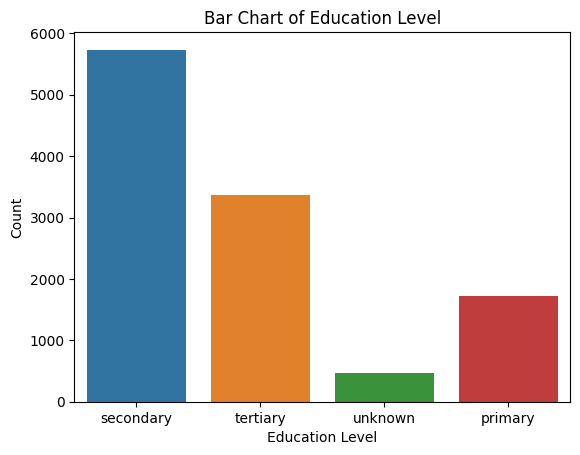

In [15]:
sns.countplot(data=marketing, x='education')
plt.title('Bar Chart of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

<ipython-input-16-0d561ac46cd5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=subscribers_edu, x='education', y='count', hue='TermDeposit', ci=None)


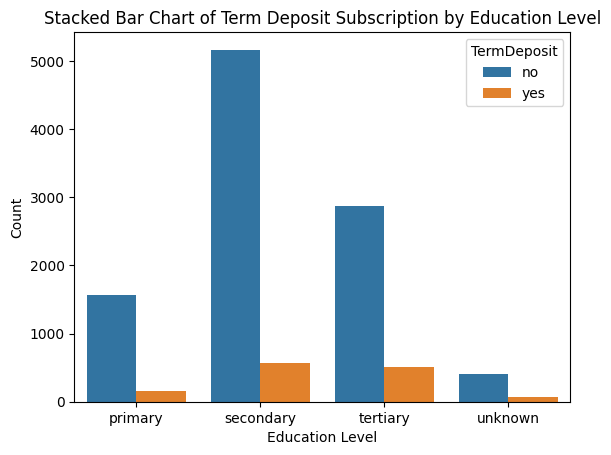

In [16]:
subscribers_edu = marketing.groupby(['TermDeposit', 'education']).size().reset_index(name='count')
sns.barplot(data=subscribers_edu, x='education', y='count', hue='TermDeposit', ci=None)
plt.title('Stacked Bar Chart of Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


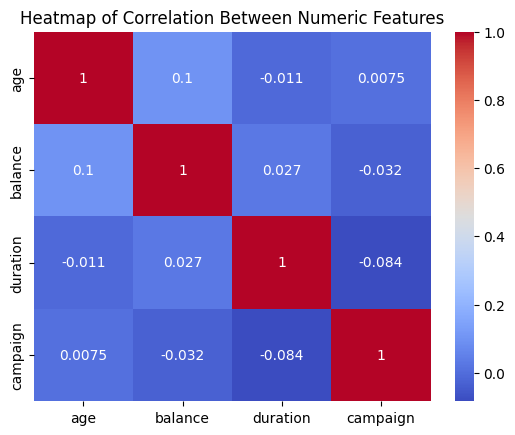

In [17]:
sns.heatmap(marketing[['age', 'balance', 'duration', 'campaign']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numeric Features')
plt.show()

Insights:

1. Bar chart of term deposit subscription: We can see the number or proportion of customers who subscribed to the term deposit, which can help us to evaluate the success of marketing efforts. For example, we notice that only a small percentage of customers actually subscribed, which could indicate that the marketing campaign needs to be adjusted.

2. Bar chart of education level: This visualization shows the frequency of each education level in the dataset. We can see that the majority of customers have a secondary or tertiary education level, while a smaller proportion have a primary education level.

3. Stacked bar chart of term deposit subscription by education level: This visualization shows the distribution of term deposit subscriptions across different education levels. We can see that a higher proportion of customers with a tertiary education level subscribed to a term deposit compared to those with a secondary or primary education level.

4. Heatmap of correlation between numeric features: This visualization shows the correlation coefficients between pairs of numeric features in the dataset. We can see, among other things, that there is a positive correlation between balance and age, and a negative correlation between duration and campaign. This suggests that customers with higher balances tend to be older, and that longer campaign durations are associated with a lower number of campaigns.

# Andres Bereich

In [2]:
#Start the EDA Process
#We begin loading in the data + relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
df = pd.read_csv('bank_marketing.csv')

In [4]:
# Get the first few rows of the DataFrame
print(df.head())

   age  education default  balance housing   contact month  duration  \
0   31  secondary      no      131     yes  cellular   may       294   
1   35   tertiary      no      171      no  cellular   aug       204   
2   28  secondary      no     3029     yes  cellular   may        58   
3   29  secondary      no     1937      no   unknown   aug         6   
4   54  secondary      no     1483     yes  cellular   may        53   

   campaign TermDeposit  
0         1          no  
1         2          no  
2         6          no  
3         1          no  
4         2          no  


In [5]:
# Get the shape of the DataFrame
print(df.shape)

#We have 11.302 counts and 10 variables

(11302, 10)


In [6]:
# Get the data types of the columns
print(df.dtypes)

#We have a a even mix between categorical data and numerical data

age             int64
education      object
default        object
balance         int64
housing        object
contact        object
month          object
duration        int64
campaign        int64
TermDeposit    object
dtype: object


In [7]:
# Get the summary statistics of the numeric columns
print(df.describe())

                age       balance      duration      campaign
count  11302.000000  11302.000000  11302.000000  11302.000000
mean      40.813750   1399.844364    258.175013      2.738276
std       10.529218   3131.946497    258.786621      3.085483
min       18.000000  -8019.000000      1.000000      1.000000
25%       33.000000     68.000000    102.000000      1.000000
50%       39.000000    458.000000    180.000000      2.000000
75%       48.000000   1411.000000    318.000000      3.000000
max       95.000000  66721.000000   3785.000000     55.000000


In [8]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

#The dataset seems to be rather clean already, reducing the amount of data preparation to do before we analyze everything

age            0
education      0
default        0
balance        0
housing        0
contact        0
month          0
duration       0
campaign       0
TermDeposit    0
dtype: int64


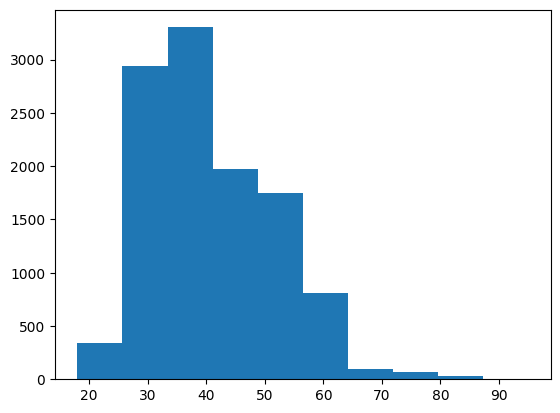

In [9]:
# Plot a histogram of a numeric column
plt.hist(df['age'])
plt.show()

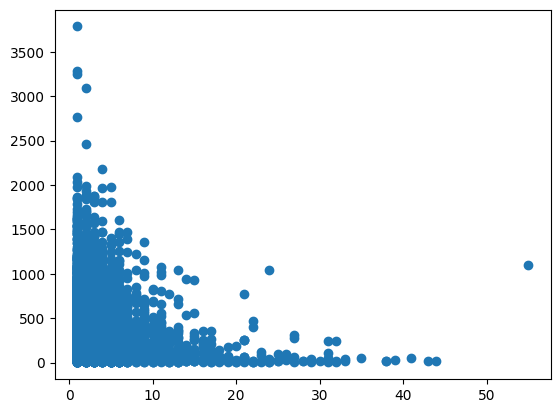

In [10]:
# Plot a scatter plot of two numeric columns
plt.scatter(df['campaign'], df['duration'])
plt.show()

In [ ]:
# Plot a bar plot of a categorical column
sns.countplot(x='column_name', data=df)
plt.show()

<ipython-input-18-8c108bceb37c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


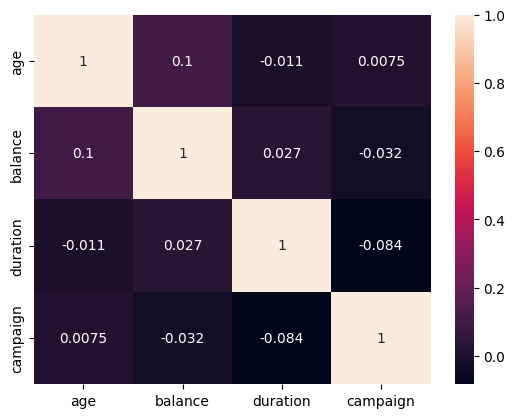

In [18]:
# Plot a correlation matrix of the numeric columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Davids Bereich

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np



# Convert to numpy array
yes_no_array = np.array(marketing["TermDeposit"])

# Use numpy where() function to convert yes and no values to 1 and 0 respectively
marketing["TermDeposit"] = np.where(yes_no_array == 'yes', 1, 0)

marketing_clas = marketing.loc[:,["age", "balance", "TermDeposit"]]
marketing_clas.dropna(inplace=True)
marketing_clas = pd.get_dummies(marketing_clas)


# Split your data into training and testing sets
train, test = train_test_split(marketing_clas, test_size=0.2, random_state=39)

X_train = train.loc[:,train.columns != "TermDeposit"]
y_train = train[["TermDeposit"]].values.ravel()


X_test = test.loc[:,test.columns != "TermDeposit"]
y_test = test[["TermDeposit"]].values.ravel()

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9041 entries, 5120 to 8297
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      9041 non-null   int64
 1   balance  9041 non-null   int64
dtypes: int64(2)
memory usage: 211.9 KB


<ipython-input-76-e44dd60e65df>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  marketing["TermDeposit"] = np.where(yes_no_array == 'yes', 1, 0)


In [ ]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='none').fit(X_train, y_train)

logistic_reg_pred_train = logreg.predict(X_train)
logistic_reg_pred = logreg.predict(X_test)

logistic_reg_pred_train_proba = logreg.predict_proba(X_train)[:,1]
logistic_reg_pred_proba = logreg.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


ValueError: ignored

In [ ]:
###Decision Tree

In [ ]:
###KNN-Classifier

In [ ]:
###Naive-Bayes analyser

# Patricks Bereich

In [ ]:
from scipy.spatial import distance
distance.euclidean(marketing['age'], marketing['balance'])


362839.3483595736

In [ ]:
distance.euclidean(marketing['age'], marketing['duration'])

35954.30751662449

In [ ]:
distance.euclidean(marketing['age'], marketing['campaign'])

4211.878796926616

In [ ]:
distance.euclidean(marketing['balance'], marketing['duration'])

354739.3880766555

In [ ]:
distance.euclidean(marketing['balance'], marketing['campaign'])

364581.9393483446

In [ ]:
distance.euclidean(marketing['campaign'], marketing['duration'])

38676.643184226836

In [ ]:
#1 Preparation: Transform the variables into having a mean of 0 and a standard deviation of 1 using StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
marketing["age scaled"] = standard_scaler.fit_transform(marketing[["age"]]) 
marketing["balance scaled"] = standard_scaler.fit_transform(marketing[["balance"]]) 


marketing[["age", "age scaled", "balance", "balance scaled"]].describe()

,age,age scaled,balance,balance scaled
count,11302.000000,1.130200e+04,11302.000000,1.130200e+04
mean,40.813750,-2.558759e-16,1399.844364,2.200407e-17
std,10.529218,1.000044e+00,3131.946497,1.000044e+00
min,18.000000,-2.166805e+00,-8019.000000,-3.007478e+00
25%,33.000000,-7.421345e-01,68.000000,-4.252637e-01
50%,39.000000,-1.722664e-01,458.000000,-3.007350e-01
75%,48.000000,6.825358e-01,1411.000000,3.562044e-03
max,95.000000,5.146503e+00,66721.000000,2.085733e+01


In [ ]:
#2 Dropping NA values for both columns

marketing_no_na = marketing.dropna(subset =["age scaled", "balance scaled"]).reset_index()

X = marketing_no_na[["age scaled", "balance scaled"]].values

In [ ]:
#3 Calculating DB-score values to decide on the number of clusters

db_scores = []
K = range(2,10)

for k in K:
    print("current number of clusters: ", k)
    kmeans_preds = KMeans(n_clusters=k).fit_predict(X)
    print("calculating Davies-Bouldin score")
    db_scores.append(davies_bouldin_score(X, kmeans_preds))
    
db_scores

current number of clusters:  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score


[0.9217941412092553,
 0.7012044059443889,
 0.7091793591401898,
 0.733809585304677,
 0.7133976451725964,
 0.7975373002245593,
 0.794483856110802,
 0.7707379499306305]

<Axes: xlabel='K', ylabel='Davies-Bouldin Score'>

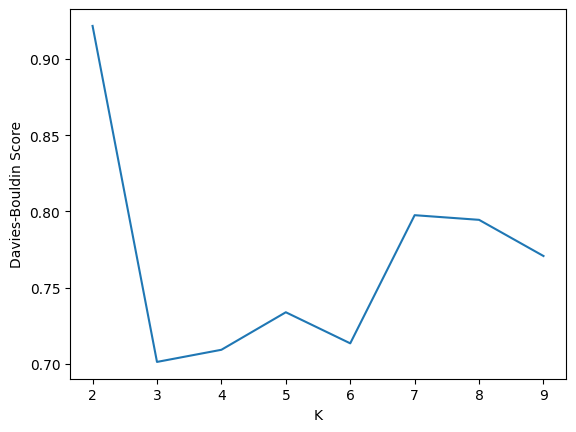

In [ ]:
#4 Drawing the DB-score graph

db_scores_frame = pd.DataFrame({"K":K, "Davies-Bouldin Score": db_scores})
sns.lineplot(data=db_scores_frame, x="K", y="Davies-Bouldin Score")

#--> 3 seems to be the perfect number of clusters

In [ ]:
#5 Using WSS as another method for determining the best number of clusters

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

sum_of_squares_scaled = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    sum_of_squares_scaled.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='K', ylabel='sum_of_squares'>

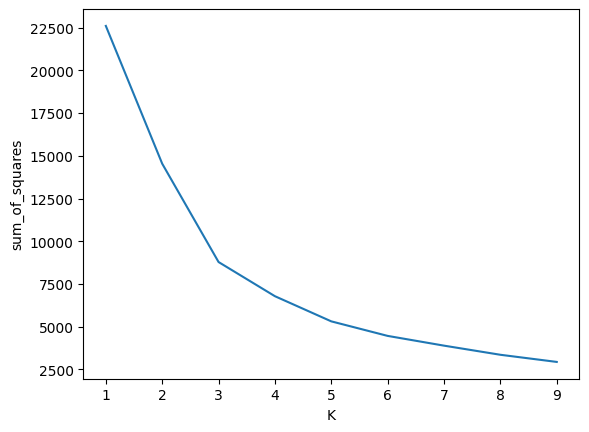

In [ ]:
sum_of_squares_scaled_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares_scaled})
sns.lineplot(data=sum_of_squares_scaled_frame, x="K", y="sum_of_squares")

#--> Also 3 seems to be the right number

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='age scaled', ylabel='balance scaled'>

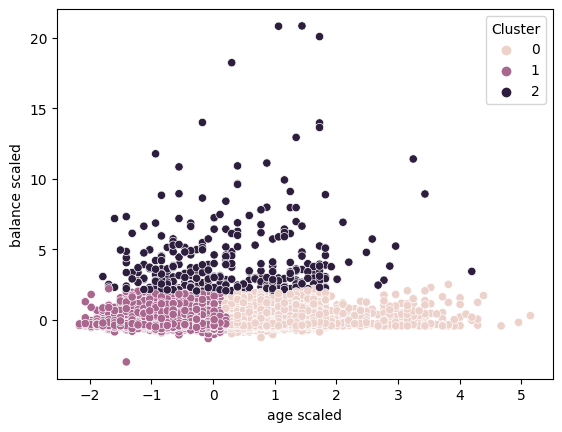

In [ ]:
#6.1 Drawing the 3 Clusters (scaled)
from sklearn.cluster import KMeans
from seaborn import scatterplot

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

plot_data = marketing[["age scaled", "balance scaled"]].dropna()
plot_data["Cluster"] = kmeans.labels_
plot_data

sns.scatterplot(data=plot_data, x="age scaled", y="balance scaled", hue="Cluster")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='age', ylabel='balance'>

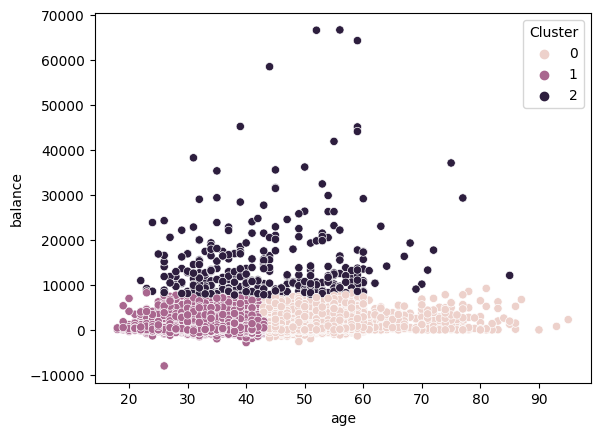

In [ ]:
#6.2 Drawing the 3 Clusters (not scaled)
from sklearn.cluster import KMeans
from seaborn import scatterplot

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

plot_data = marketing[["age", "balance"]].dropna()
plot_data["Cluster"] = kmeans.labels_
plot_data

sns.scatterplot(data=plot_data, x="age", y="balance", hue="Cluster")

In [ ]:
#7 Calculate Oberservations per Cluster and cluster centers
from collections import Counter

Counter(kmeans.labels_)
#kmeans.cluster_centers_


Counter({1: 6937, 0: 3998, 2: 367})

In the following I will explore the cluster properties by using three techniques: 

1.   Calculating the mean, median and mode per cluster
2.   Different visualization techniques to explore the differences between customer segments. For example, box plots  to compare the distribution of different features across clusters
3. Statistical tests to determine if there are significant differences between customer segments. For example, ANOVA to test if there are significant differences in the means of different features across clusters or chi-squared tests to test if there are significant differences in the proportions of categorical variables across clusters.


In [ ]:
#8.1: Explore cluster properties: Calculating mean, median, and mode per cluster for each variable
cluster_summary = pd.DataFrame({'mean_age': marketing.groupby('Cluster')['age'].mean(),
                                'median_age': marketing.groupby('Cluster')['age'].median(),
                                'mode_age': marketing.groupby('Cluster')['age'].apply(lambda x: stats.mode(x)[0][0]),
                                'mean_balance': marketing.groupby('Cluster')['balance'].mean(),
                                'median_balance': marketing.groupby('Cluster')['balance'].median(),
                                'mode_balance': marketing.groupby('Cluster')['balance'].apply(lambda x: stats.mode(x)[0][0])})

print(cluster_summary)

          mean_age  median_age  mode_age  mean_balance  median_balance  \
Cluster                                                                  
0        52.290895        51.0        46   1168.522261           536.5   
1        34.060977        34.0        32    864.792994           378.0   
2        43.425068        42.0        32  14033.297003         11008.0   

         mode_balance  
Cluster                
0                   0  
1                   0  
2               11862  


<ipython-input-71-988b3749ffcf>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'mode_age': marketing.groupby('Cluster')['age'].apply(lambda x: stats.mode(x)[0][0]),
<ipython-input-71-988b3749ffcf>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'mode_balance': 

**Interpretation: Based on the summary statistics for the three clusters:**

- Cluster 0: Customers in this cluster have a higher average age (52.3 years) and a lower balance (mean of 1168.5). The median age and balance are also relatively low. The mode age is 46, which is the most frequent age in this cluster. The mode balance is 0, which suggests that many customers in this cluster have a zero balance.
- Cluster 1: Customers in this cluster have a lower average age (34.1 years) and a lower balance (mean of 864.8). The median age and balance are also relatively low. The mode age is 32, which is the most frequent age in this cluster. The mode balance is 0, which suggests that many customers in this cluster have a zero balance.
- Cluster 2: Customers in this cluster have a higher average age (43.4 years) and a much higher balance (mean of 14,033.3). The median balance is also very high at 11,008. The mode age is 32, which is much lower than the average and median ages in this cluster. The mode balance is 11,862, which is also lower than the mean and median balances in this cluster.

These results suggest that the three clusters represent distinct groups of customers with different ages and account balances. Cluster 0 and 1 are characterized by lower balances, with cluster 0 being composed of customers who are generally older and cluster 1 being composed of younger customers. Cluster 2, on the other hand, has much higher account balances and is composed of customers who are generally older, but have a mode age that is lower than the average and median ages.

<Axes: xlabel='count', ylabel='education'>

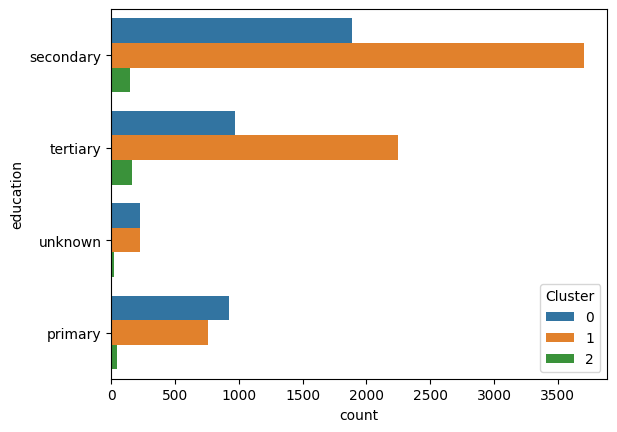

In [ ]:
#8.2 Exploring cluster properties: education per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="education", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the fraction/number of bank customers with different educational backgrounds could vary significantly for each cluster on the first sight at least. This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on the education. For example we have a big fraction of customers that belong to cluster 0 and have just a primary education as well as a low number of customer of cluster 0 with a tertiary education. This could of course be due to the age of the customers, which starts at 18 in the dataset.

<Axes: xlabel='count', ylabel='TermDeposit'>

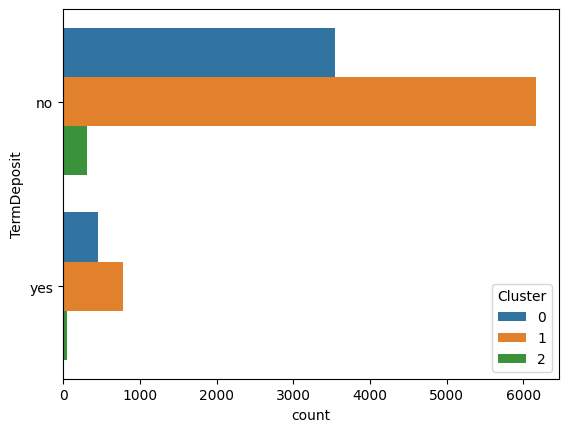

In [ ]:
#8.2 Exploring cluster properties: TermDeposit per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="TermDeposit", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have subscribed to a term deposit does not vary significantly for each cluster, considering the fact that cluster 1 contains the most observations. Therefore, we can assume that belonging to one cluster does not influence whether a customer has a term deposit or not. This assumption can be considered true by looking at the Chi-Squared test for TermDeposit down below.

<Axes: xlabel='count', ylabel='default'>

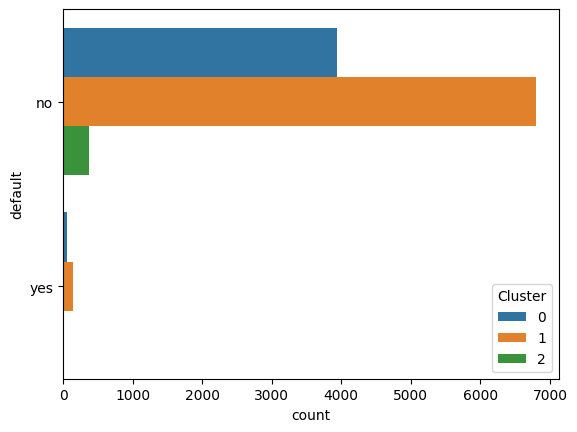

In [ ]:
#8.2 Exploring cluster properties: default per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="default", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have a credit in default could vary significantly for each cluster on the first sight at least. This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on whether a customer has a credit in default

<Axes: xlabel='count', ylabel='housing'>

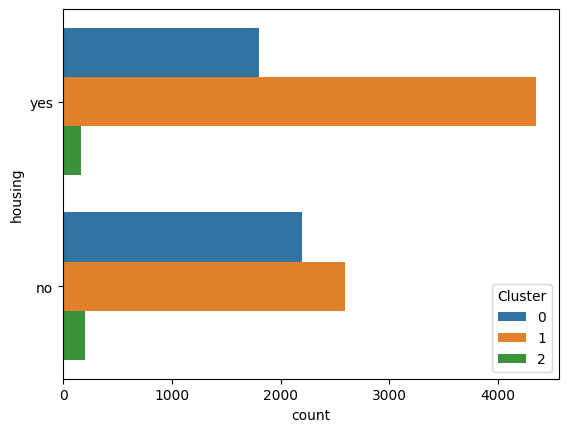

In [ ]:
#8.2 Exploring cluster properties: default per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="housing", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have a housing loan varies significantly for each cluster . This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on whether a customer has a housing loan. In the graph above you can see that especially customers of cluster 1, which are typically younger ones above 40 years tend to have a housing loan, which is no surprise as these customers are also rather in the focus group of building new houses for family e.g.

In [ ]:
#8.3 Exploring cluster properties: ANOVA-test for balance
from scipy.stats import f_oneway

# extract balance values and cluster labels from marketing dataframe
balance_data = marketing['balance'].values
cluster_labels = kmeans.labels_

# create a list to store the balance values for each cluster
cluster_balance = []
for i in range(kmeans.n_clusters):
    cluster_balance.append(balance_data[cluster_labels == i])

# conduct one-way ANOVA test to compare the means of balance across clusters
f_statistic, p_value = f_oneway(*cluster_balance)

if p_value < 0.05:
    print("There is a significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))
else:
    print("There is no significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))


There is a significant difference in balance among the clusters (p-value = 0.000)


**Interpretation:**
The result of the ANOVA test indicates whether there is a significant difference in the means of a numerical variable (in this case, the "balance" feature) across different clusters. A p-value less than the significance level (usually 0.05) suggests that there is a statistically significant difference in balance among the clusters. The p-value of 0.000 in this case indicates that the difference in balance across the clusters is very unlikely to have occurred by chance, and therefore, there is a significant difference in balance among the clusters.

In [ ]:
#8.3 Exploring cluster properties: ANOVA-test for duration
from scipy.stats import f_oneway

# extract duration values and cluster labels from marketing dataframe
duration_data = marketing['duration'].values
cluster_labels = kmeans.labels_

# create a list to store the duration values for each cluster
cluster_duration = []
for i in range(kmeans.n_clusters):
    cluster_duration.append(duration_data[cluster_labels == i])

# conduct one-way ANOVA test to compare the means of duration across clusters
f_statistic, p_value = f_oneway(*cluster_duration)

if p_value < 0.05:
    print("There is a significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))
else:
    print("There is no significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))


There is no significant difference in balance among the clusters (p-value = 0.085)


**Interpretation:**
The result of the test indicates that the p-value is 0.085, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in "duration" means among the clusters.

In other words, the analysis suggests that the average "duration" value does not vary significantly across different clusters.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for education
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["education"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared test results for education status and cluster membership:
Chi-squared statistic: 394.60571165429906
P-value: 4.037359629145245e-82
Degrees of freedom: 6
Expected frequencies:
 [[ 609.8524155  2028.36064413 1193.88161387  165.90532649]
 [1058.1656344  3519.44416917 2071.52495134  287.86524509]
 [  55.9819501   186.19518669  109.59343479   15.22942842]]


**Interpretation:**
The chi-squared test results show that there is a significant relationship between education status and cluster membership.

The chi-squared statistic value of 394.605 and the p-value of 4.037359629145245e-82 indicate that the differences between the observed and expected frequencies are too large to be explained by chance. In other words, there is evidence that the distribution of education status is not the same across all three clusters.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for TermDeposit
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["TermDeposit"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results for education status and cluster membership:
Chi-squared statistic: 3.5848511147556517
P-value: 0.16655568893961578
Degrees of freedom: 2
Expected frequencies:
 [[3540.96443107  457.03556893]
 [6143.98955937  793.01044063]
 [ 325.04600956   41.95399044]]


**Interpretation:** The results of the test show that the chi-squared statistic is 3.58 and the p-value is 0.17. The degrees of freedom are 2, and the expected frequencies table shows the expected counts under the null hypothesis.

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis, and we conclude that there is no significant association between TermDeposit variable and cluster membership. This suggests that cluster membership is not a significant factor in determining whether a customer will subscribe to a term deposit.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for default
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["default"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results for education status and cluster membership:
Chi-squared statistic: 9.01663245744914
P-value: 0.011016994666667619
Degrees of freedom: 2
Expected frequencies:
 [[3.92477526e+03 7.32247390e+01]
 [6.80994647e+03 1.27053530e+02]
 [3.60278269e+02 6.72173067e+00]]



**Interpretation:** These results suggest that there may be a significant association between the "default" variable and the cluster membership. The chi-squared statistic is 9.0166, which indicates that there is a deviation from the expected frequencies that is not likely due to chance. The p-value is 0.011, which is less than the conventional alpha level of 0.05, suggesting that we can reject the null hypothesis of no association between "default" and cluster membership. The degrees of freedom are 2, indicating that there are two levels of the "default" variable that are being compared across the three clusters. 

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for housing
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["housing"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test results for education status and cluster membership:
Chi-squared statistic: 335.00464804371734
P-value: 1.797483743651756e-73
Degrees of freedom: 2
Expected frequencies:
 [[1765.52981773 2232.47018227]
 [3063.40178729 3873.59821271]
 [ 162.06839497  204.93160503]]


**Interpretation:** The chi-squared test result shows that there is a significant association between the housing variable and the clusters. The chi-squared statistic value of 335.0046 is very large, indicating a strong association. The p-value is very small (1.797483743651756e-73), indicating that it is extremely unlikely that the observed association is due to chance. The degrees of freedom is 2, which corresponds to the number of categories in the housing variable minus 1. Overall, the test proves the assumption mentioned before that the clusters have influence on housing loans.